In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from pathlib import Path
import cv2
from skimage import io
from IPython.display import Image, display
import dlib

In [3]:
# initialize face detectors
dlib_face_detector = dlib.get_frontal_face_detector() 

face_cascade_name = '../../utils/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier()
face_cascade.load(face_cascade_name)

detectors = {
    'dlib': lambda img: len(dlib_face_detector(img, 1)) > 0,
    'haar_cascades': lambda img: len(face_cascade.detectMultiScale(img, 1.1, 2, 0|cv2.CASCADE_SCALE_IMAGE, (5, 5))) > 0
}

In [4]:
def load_image(image_path):
    return cv2.cvtColor(io.imread(image_path), cv2.COLOR_BGR2RGB)

def display_image_and_detections(image_path):
    image = load_image(image_path)
    display(Image(filename=image_path, width=100))
    for d_name, d in detectors.items():
        print('{} : {}'.format(d_name, d(image)))

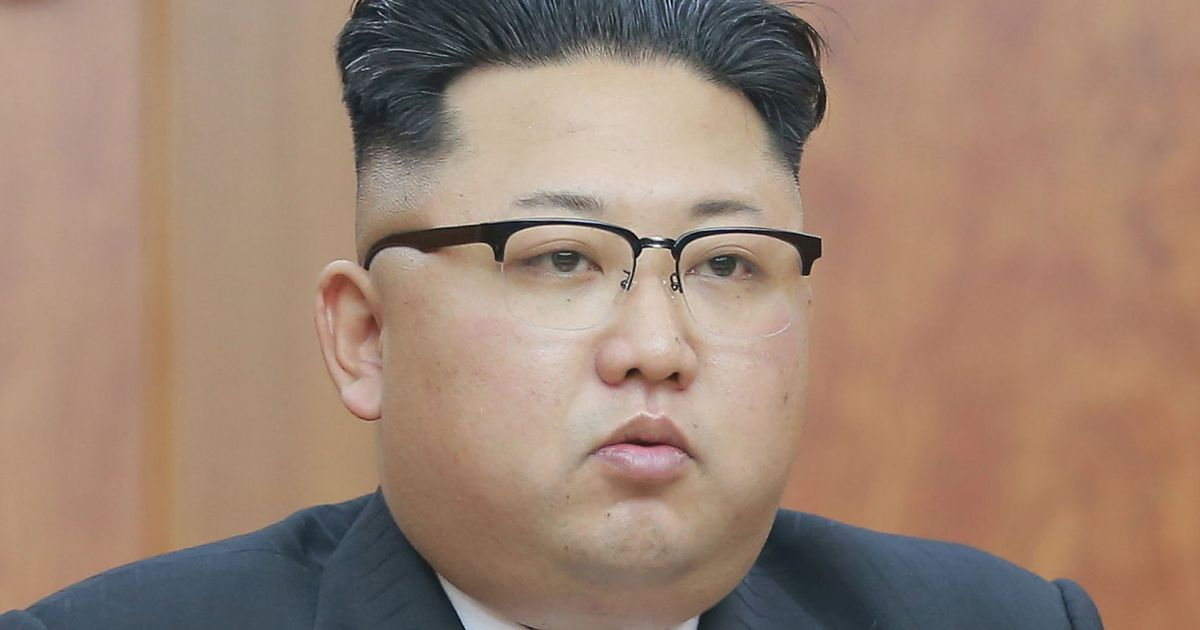

dlib : True
haar_cascades : True


In [5]:
# both detectors working on a higher resolution image!

display_image_and_detections('kimmy.jpg')

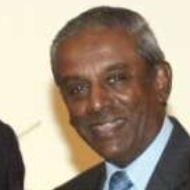

dlib : True
haar_cascades : True


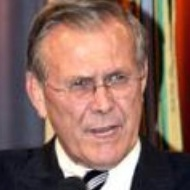

dlib : True
haar_cascades : True


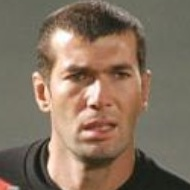

dlib : True
haar_cascades : True


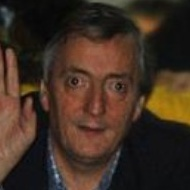

dlib : True
haar_cascades : True


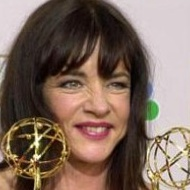

dlib : True
haar_cascades : True


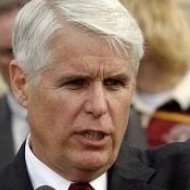

dlib : True
haar_cascades : True


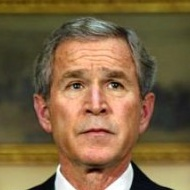

dlib : True
haar_cascades : True


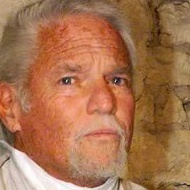

dlib : True
haar_cascades : True


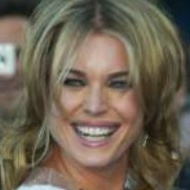

dlib : True
haar_cascades : True


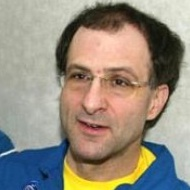

dlib : True
haar_cascades : True


In [6]:
# detections on our images

_ = [display_image_and_detections(p.as_posix()) for p in list(Path('../../data/cifar-11/face').iterdir())[:10]]

In [7]:
def detection_summary(class_name):
    class_dir = '../../data/cifar-11/' + class_name

    detection_counts = {d_name: 0 for d_name in detectors.keys()}
    for p in Path(class_dir).iterdir():
        for d_name in detection_counts.keys():
            detection_counts[d_name] += detectors[d_name](load_image(p.as_posix()))

    print("Percentage of faces in 'cifar-11/{}' detected for each detector:".format(class_name))
    total_images = len(list(Path(class_dir).iterdir()))
    for d_name, c in detection_counts.items():
        print('{}: {}'.format(d_name, 100.0 * c / total_images))

In [8]:
_ = list(map(detection_summary, ['face', 'airplane', 'frog', 'ship']))

Percentage of faces in 'cifar-11/face' detected for each detector:
dlib: 99.41666666666667
haar_cascades: 99.78333333333333
Percentage of faces in 'cifar-11/airplane' detected for each detector:
dlib: 0.0
haar_cascades: 0.0
Percentage of faces in 'cifar-11/frog' detected for each detector:
dlib: 0.0
haar_cascades: 0.0
Percentage of faces in 'cifar-11/ship' detected for each detector:
dlib: 0.0
haar_cascades: 0.016666666666666666
